# Project 1: Titanic EDA

Wesley Bosse for DSI 3 - LA
1/27/18

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.



In [1]:
#import statements, matplotlib inline command
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in the data and display to confirm
df = pd.read_csv('train.csv')
df.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with ¯\\(ツ)/¯

Note: `NaN`, empty, and missing are synonymous.

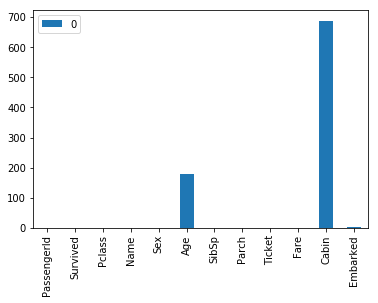

In [3]:
# 1) Create bar chart showing # of missing vals in each col
missing_vals = pd.DataFrame(df.isnull().sum())
missing_vals.plot(kind='bar')

In [4]:
# 2) Which column has the most NaN values? How many cells in that column are empty?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            178
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

Cabin has the most missing values at 687, Age is second with 177.

In [5]:
# 3) Delete all rows where Embarked is empty
df = df.dropna(subset = ['Embarked'])

In [6]:
# 4) Fill all empty cabins with ¯\(ツ)/¯
df['Cabin'] = df['Cabin'].replace(np.nan, '¯\(ツ)/¯')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`

In [7]:
# 1) Create FamilyCount column by summing SibSp and Parch
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1


In [8]:
# 2) Create IsReverend column. 1 = preacher, 0 = not
df['IsReverend'] = df['Name'].str.contains('Rev').astype(int)

In [9]:
# 3) Split embarked and sex, using dummies
df_dummies = pd.get_dummies(df, columns=['Embarked', 'Sex'])
df_dummies.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Sex_males
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1,0


## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **Â¯\\_(ãƒ„)_/Â¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [10]:
# 1) Calc the overall survival rate
survival_rate = (df['Survived'].sum() / df.shape[0]) * 100
print('{} people out of {} survived'.format(df['Survived'].sum(),df.shape[0]))
print('Survival Rate: {}%'.format(survival_rate))

341 people out of 890 survived
Survival Rate: 38.31460674157303%


In [11]:
# 2) Which gender fared the worst(with survival rates in %)?
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
males     1.000000
Name: Survived, dtype: float64

Males had the worse chance of survival with 18.8% odds

In [12]:
# 3) Calc survival rates for each passenger class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.627907
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Higher class passengers tend to have a higher survival rate

In [13]:
# 4) Calc survival rate of reverend
df.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385747
1    0.000000
Name: Survived, dtype: float64

Reverends didn't make it out. Bless up

In [14]:
# 5) Survival rate for passengers with an unknown cabin number
df.groupby((df['Cabin'] == '¯\(ツ)/¯'))['Survived'].mean()
print('Passengers with an unkown cabin number had a survival rate of {}%'.format(df.groupby((df['Cabin'] == '¯\(ツ)/¯'))['Survived'].mean()[1] * 100))

Passengers with an unkown cabin number had a survival rate of 30.08720930232558%


In [15]:
# 6) Calc survival rate where age = NaN
df_age = df.dropna(subset = ['Age'])
no_age_survival_rate = ((df['Survived'].sum() - df_age['Survived'].sum()) / (df.shape[0] - df_age.shape[0])) * 100
print('{} people out of {} survived'.format((df['Survived'].sum() - df_age['Survived'].sum()),(df.shape[0] - df_age.shape[0])))
print('Survival Rate: {}%'.format(no_age_survival_rate))

53 people out of 178 survived
Survival Rate: 29.775280898876407%


In [16]:
# 7) Calc survival rate based on port of survival
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.337984
Name: Survived, dtype: float64

In [17]:
df.groupby((df['Age'] < 12) & (df['Pclass'] == 1))['Survived'].mean()

False    0.38149
True     0.75000
Name: Survived, dtype: float64

In [18]:
df.groupby((df['Age'] < 12) & (df['Pclass'] == 2))['Survived'].mean()

False    0.371134
True     1.000000
Name: Survived, dtype: float64

In [19]:
df.groupby((df['Age'] < 12) & (df['Pclass'] == 3))['Survived'].mean()

False    0.381969
True     0.404255
Name: Survived, dtype: float64

In [20]:
# 9) Find the captain, did he make it?
df.loc[df['Name'].str.contains('Capt'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0


In [21]:
# 10) Find the passengers that paid the most to die
dead_fare = df.loc[(df['Survived']==0), :]
dead_fare.loc[dead_fare['Fare']>=263, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0


In [23]:
# 11) How does having family on board affect chance of survival
df.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.302239
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


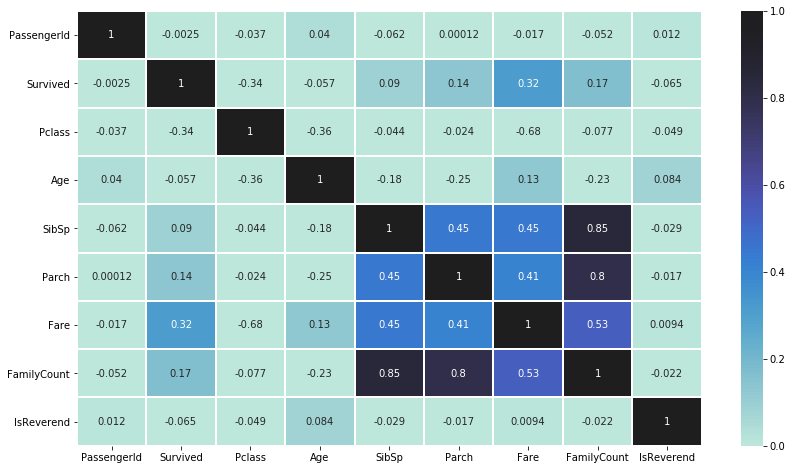

In [24]:
# Create a correlation heatmap of our data
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=1, center=1, vmin=0, vmax=1);

#this reveals a shocking stat

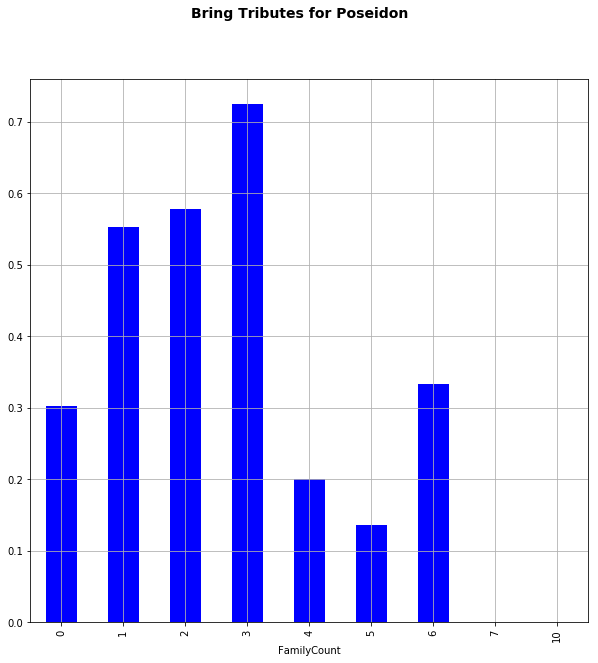

In [25]:
fig = plt.figure()
fig.suptitle('Bring Tributes for Poseidon', fontsize=14, fontweight='bold')

df.groupby('FamilyCount')['Survived'].mean().plot(figsize=(10,10), kind='bar', grid=True, color='blue');

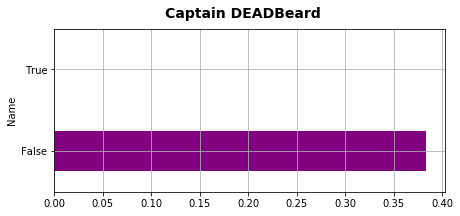

In [26]:
fig = plt.figure()
fig.suptitle('Captain DEADBeard', fontsize=14, fontweight='bold')

df.groupby(df['Name'].str.contains('Capt'))['Survived'].mean().plot(figsize=(7,3), kind='barh', grid=True, color='Purple');

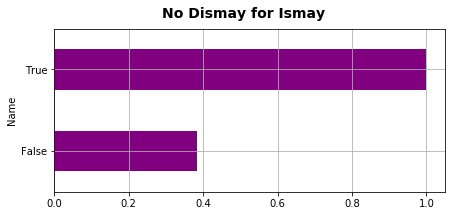

In [27]:
fig = plt.figure()
fig.suptitle('No Dismay for Ismay', fontsize=14, fontweight='bold')

df.groupby(df['Name'].str.contains('Ismay'))['Survived'].mean().plot(figsize=(7,3), kind='barh', grid=True, color='Purple');

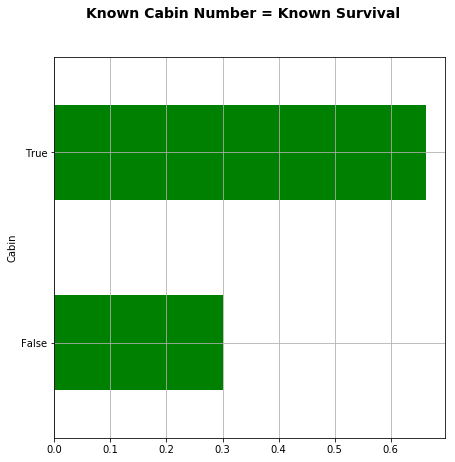

In [32]:
fig = plt.figure()
fig.suptitle('Known Cabin Number = Known Survival', fontsize=14, fontweight='bold')

df.groupby((df['Cabin'] != '¯\(ツ)/¯'))['Survived'].mean().plot(figsize=(7,7), kind='barh', grid=True, color='green');